
Background:
Renewable energy consumption plays a crucial role in sustainable development and addressing climate change. Understanding the trends, patterns, and disparities in renewable energy consumption across countries can provide valuable insights for policymakers, energy planners, and researchers to promote renewable energy adoption and achieve global sustainability goals
.
Objective:
The objective of this analysis is to explore and analyse renewable energy consumption data across countries to identify trends, patterns, and variations in renewable energy usage. By examining key indicators such as country income group, region, and energy consumption levels over time, we aim to assess the progress, challenges, and opportunities for advancing renewable energy adoption on a global scale.


In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-pandas for data exploration and manipulation

-numpy is for numerical python

-matplotlib and seaborn are data visualization

In [4]:
#load the dataset 
df=pd.read_csv(r"C:\Users\Administrator\Downloads\Renewable Energy.csv")

EDA(Explatory Data Analysis)

EDA can be leveraged to check for outliers, patterns, and trends in the given data.


EDA helps to find meaningful patterns in data.


EDA provides in-depth insights into the data sets to solve our business problems.


EDA gives a clue to impute missing values in the dataset

In [6]:
#check for column names
x=df.columns
for i in x:
  print(i)


Country Code
Country Name
Income Group
Indicator Code
Indicator Name
Region
Year
Energy Consump.


In [7]:
#acces the first 5 rows
df.head()

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,ABW,Aruba,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Latin America & Caribbean,1/1/1990,0.268747
1,AFG,Afghanistan,Low income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,South Asia,1/1/1990,15.924532
2,AGO,Angola,Lower middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/1990,72.255252
3,ALB,Albania,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,25.518088
4,AND,Andorra,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,14.273550


In [8]:
#last 5 rows
df.tail()

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
6066,GNQ,Equatorial Guinea,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/2018,4.9047
6067,GAB,Gabon,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/2018,89.8871
6068,MUS,Mauritius,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/2018,9.1989
6069,NAM,Namibia,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/2018,30.3270
6070,ZAF,South Africa,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/2018,10.3433


In [9]:
#display the number of rows and columns
df.shape

(6071, 8)

In [10]:
#understand the data type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     6071 non-null   object 
 1   Country Name     6071 non-null   object 
 2   Income Group     6071 non-null   object 
 3   Indicator Code   6071 non-null   object 
 4   Indicator Name   6071 non-null   object 
 5   Region           6071 non-null   object 
 6   Year             6071 non-null   object 
 7   Energy Consump.  6071 non-null   float64
dtypes: float64(1), object(7)
memory usage: 379.6+ KB


In [11]:
#check for duplicates
df.duplicated().sum()

0

In [12]:
#check the number of missing valus in each column
df.isnull().sum()

Country Code       0
Country Name       0
Income Group       0
Indicator Code     0
Indicator Name     0
Region             0
Year               0
Energy Consump.    0
dtype: int64

In [13]:
#drop country code since it just a unique indetifier and we wont need it for further analysis
df=df.drop(['Country Code'],axis =1)

In [14]:
#check for categorical and non categorical columns
categorical_columns =[]
non_categorical_columns=[]
for column in df.columns:
  if df[column].dtype=='object' or df[column].dtype=='category':
    categorical_columns.append(column)
  else:
    non_categorical_columns.append(column)

print("categorical columns")
print(categorical_columns)
print("\n non categorical columns")
print(non_categorical_columns)

categorical columns
['Country Name', 'Income Group', 'Indicator Code', 'Indicator Name', 'Region', 'Year']

 non categorical columns
['Energy Consump.']


In [15]:
# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'])


In [16]:
#check for uniques in income group
df['Income Group'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [17]:
#statistical summary
df.describe()

,Year,Energy Consump.
count,6071,6071.000000
mean,2004-03-05 09:25:42.348871552,30.467386
min,1990-01-01 00:00:00,0.000000
25%,1997-01-01 00:00:00,3.272610
50%,2004-01-01 00:00:00,18.901600
75%,2011-01-01 00:00:00,52.666149
max,2018-01-01 00:00:00,98.342903
std,NaN,30.688168


**YEAR**

Min (1990-01-01 00:00:00): The earliest observation date is January 1, 1990.

25% (1997-01-01 00:00:00): 25% of the observations were recorded on or before January 1, 1997.

50% (2004-01-01 00:00:00): The median observation date is January 1, 2004, meaning half of the observations were recorded before this date and half after.

75% (2011-01-01 00:00:00): 75% of the observations were recorded on or before January 1, 2011.

Max (2018-01-01 00:00:00): The latest observation date is January 1, 2018.

Std (NaN): Standard deviation is not applicable to date values.

**ENERGY CONSUMPTION **

Mean (30.467386): The average renewable energy consumption value across all observations is approximately 30.47.

Min (0.000000): The smallest recorded renewable energy consumption value is 0 units, indicating some countries or observations had no renewable energy consumption.

25% (3.272610): 25% of the observations had a renewable energy consumption value of 3.27 units or less.

50% (18.901600): The median renewable energy consumption value is approximately 18.90 units.

75% (52.666149): 75% of the observations had a renewable energy consumption value of 52.67 units or less.

Max (98.342903): The highest recorded renewable energy consumption value is approximately 98.34 units.

Std (30.688168): The standard deviation is approximately 30.69 units, indicating the spread in the renewable energy consumption values.


**INTERPRETATION **
The dataset spans from 1990 to 2018, with the middle 50% of the data (from the 25th to the 75th percentile) falling between 1997 and 2011.

Renewable energy consumption values vary widely across countries and years, with a significant number of low values (25% of observations are 3.27 units or less) and a substantial spread in the data (standard deviation of ~30.69).

The median value of 18.90 suggests that half of the observations are below this value, indicating that a relatively small number of observations with high consumption values might be raising the mean to 30.47

The minimum value of 0 and maximum value of 98.34 highlight the disparity in renewable energy consumption levels across different countries

In [19]:

#create a function to clean outliers
def clean_outliars(column):
  Q1= df['Energy Consump.'].quantile(0.25)
  Q3=df['Energy Consump.'].quantile(0.75)
  IQR =Q3-Q1
  lower_limit= Q1-1.5*IQR
  upper_limit= Q3 + 1.5*IQR
  return df[(df['Energy Consump.']>lower_limit)&(df['Energy Consump.']< upper_limit)]

In [20]:
new_data = clean_outliars(column)
print(new_data)

           Country Name         Income Group  Indicator Code  \
0                 Aruba          High income  EG.FEC.RNEW.ZS   
1           Afghanistan           Low income  EG.FEC.RNEW.ZS   
2                Angola  Lower middle income  EG.FEC.RNEW.ZS   
3               Albania  Upper middle income  EG.FEC.RNEW.ZS   
4               Andorra          High income  EG.FEC.RNEW.ZS   
...                 ...                  ...             ...   
6066  Equatorial Guinea  Upper middle income  EG.FEC.RNEW.ZS   
6067              Gabon  Upper middle income  EG.FEC.RNEW.ZS   
6068          Mauritius  Upper middle income  EG.FEC.RNEW.ZS   
6069            Namibia  Upper middle income  EG.FEC.RNEW.ZS   
6070       South Africa  Upper middle income  EG.FEC.RNEW.ZS   

                                         Indicator Name  \
0     Renewable energy consumption (% of total final...   
1     Renewable energy consumption (% of total final...   
2     Renewable energy consumption (% of total final..

In [21]:
new_data.describe()

,Year,Energy Consump.
count,6071,6071.000000
mean,2004-03-05 09:25:42.348871552,30.467386
min,1990-01-01 00:00:00,0.000000
25%,1997-01-01 00:00:00,3.272610
50%,2004-01-01 00:00:00,18.901600
75%,2011-01-01 00:00:00,52.666149
max,2018-01-01 00:00:00,98.342903
std,NaN,30.688168


**Global Renewable Energy Consumption Analysis**

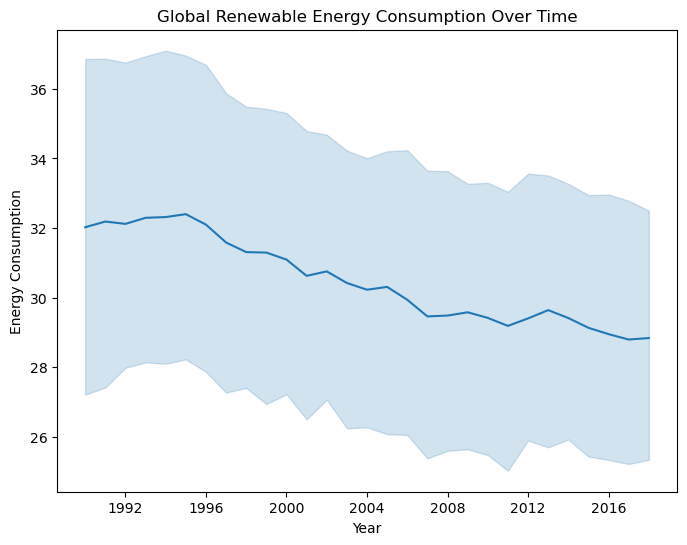

In [23]:
#global energy consumption over time
plt.figure(figsize=(8,6))
sns.lineplot(data=new_data, x='Year', y='Energy Consump.')
plt.title('Global Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()


Global Renewable Energy Consumption Over Time

The figure above shows that the global energy consumption has be in decline over time,since the data was collected in 1990 there has been general trend in decrease of global energy usage.

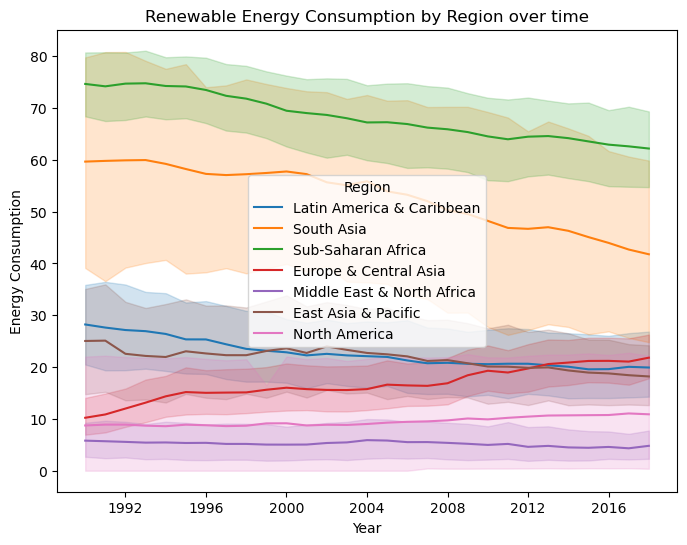

In [25]:
# Plot regional trends
plt.figure(figsize=(8,6))
sns.lineplot(data=new_data, x='Year', y='Energy Consump.', hue='Region')
plt.title('Renewable Energy Consumption by Region over time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend(title='Region')
plt.show()


Renewable Energy Consumption by Region over time

Latin America and Caribbean;There has been a general decline of renewable energy from 1990 upto 2008,from 2008 to 2018 there has been stagnation 

South Asia; general decline in amount of renewable energy

Sub-Saharan Africa; It started with high renewable energy consumption but genearlly it has been in a decline trend 

Europe and Central Asia;There has been a steady increase in the use of renewable energy since 1990

Middle East and North Africa; There has been stagnation of the use of renewable energy

East Asia and Pecific;There has been slow decrease of the use of renewable energy and almost goes to stagnation

North America; The use of renewable energy has stagneted.



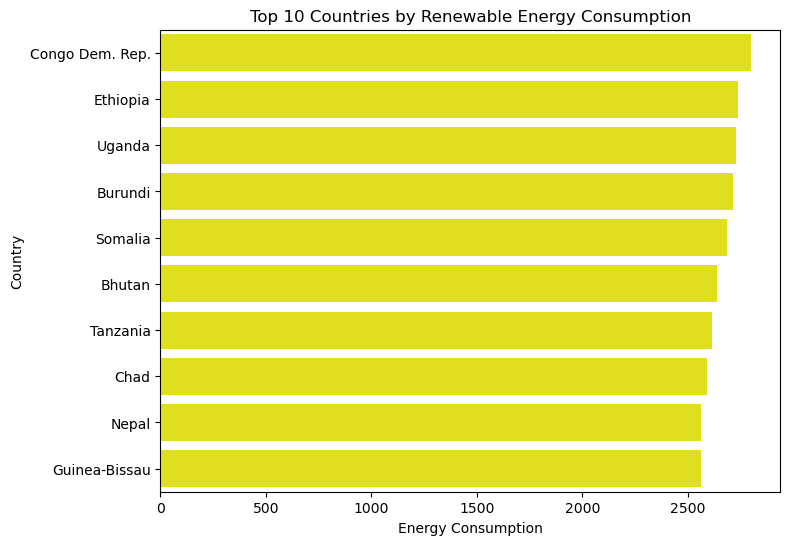

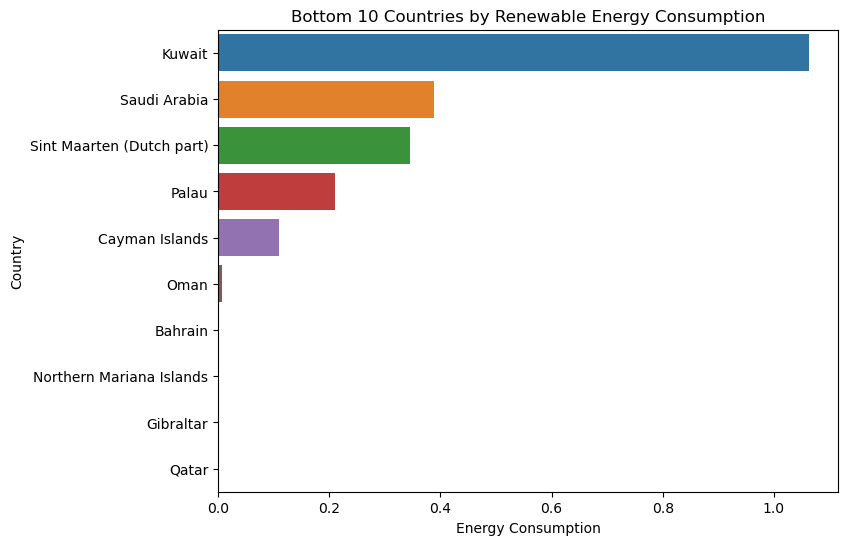

In [27]:
country_data = new_data.groupby('Country Name')['Energy Consump.'].sum().reset_index()
#reset_index(): Resets the index created by the groupby operation, converting it back into a regular column in the DataFrame
# Sort countries by total energy consumption
country_data_sorted = country_data.sort_values(by='Energy Consump.', ascending=False)

# Top 10 countries
top_10_countries = country_data_sorted.head(10)

# Bottom 10 countries
bottom_10_countries = country_data_sorted.tail(10)

# Plot top 10 countries
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_countries, x='Energy Consump.', y='Country Name',color='yellow')
plt.title('Top 10 Countries by Renewable Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Country')
plt.show()

# Plot bottom 10 countries
plt.figure(figsize=(8,6))
sns.barplot(data=bottom_10_countries, x='Energy Consump.', y='Country Name')
plt.title('Bottom 10 Countries by Renewable Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Country')
plt.show()



Top 10 countries by energy consumption are DRC at around 2600  and in top 10 is closed by Guinue Bissau at around 2550

Bottom ten the last country is Qatar at 0.0 and in bottom ten Kuwait leads with around 1.1

Assess the growth and progress of renewable energy adoption over time.

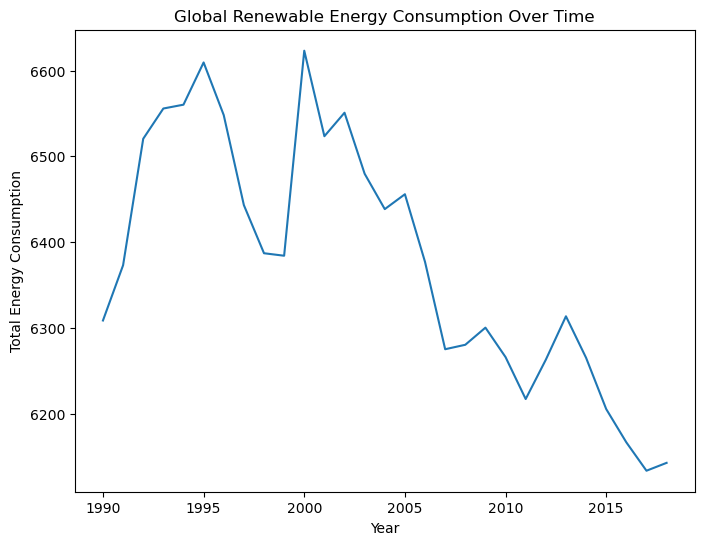

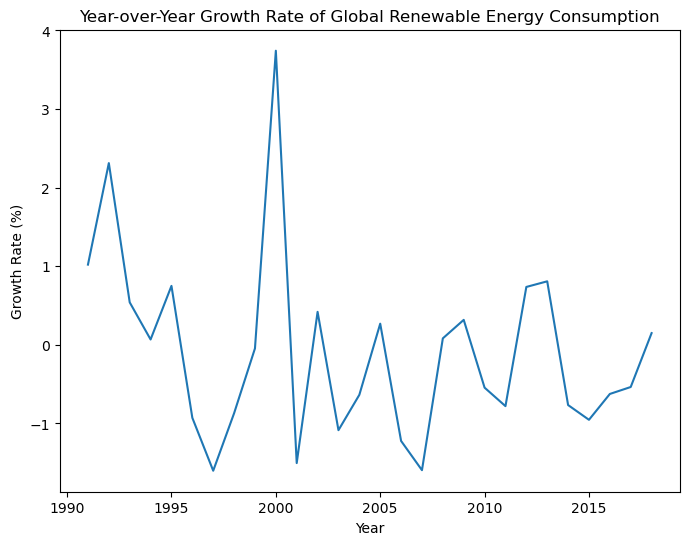

In [30]:

# Group by year and sum the energy consumption
yearly_data = new_data.groupby(new_data['Year'].dt.year)['Energy Consump.'].sum().reset_index() #convert the index back into a column,
yearly_data.columns = ['Year', 'Total Energy Consump.'] #renames the columns in the dataframe for better readabililty

# Calculate year-over-year growth
yearly_data['Growth Rate (%)'] = yearly_data['Total Energy Consump.'].pct_change() * 100 
#The pct_change() method calculates the percentage change between the current and prior element in the 'Total Energy Consump.' column.

# Plot the overall trend
plt.figure(figsize=(8,6))
sns.lineplot(data=yearly_data, x='Year', y='Total Energy Consump.')
plt.title('Global Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.show()

# Plot the growth rate
plt.figure(figsize=(8,6))
sns.lineplot(data=yearly_data, x='Year', y='Growth Rate (%)')
plt.title('Year-over-Year Growth Rate of Global Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()


Global Renewable Energy Consumption Over Time

Fom 1990 to 1995 the total renewable energy consumption increase shaply,There has been a decline from 1995 to 2000,with a sharp increase from 2000 to 2001. However from 2003 there has been a decline in total energy consumption.

INCOME GROUP ANALYSIS

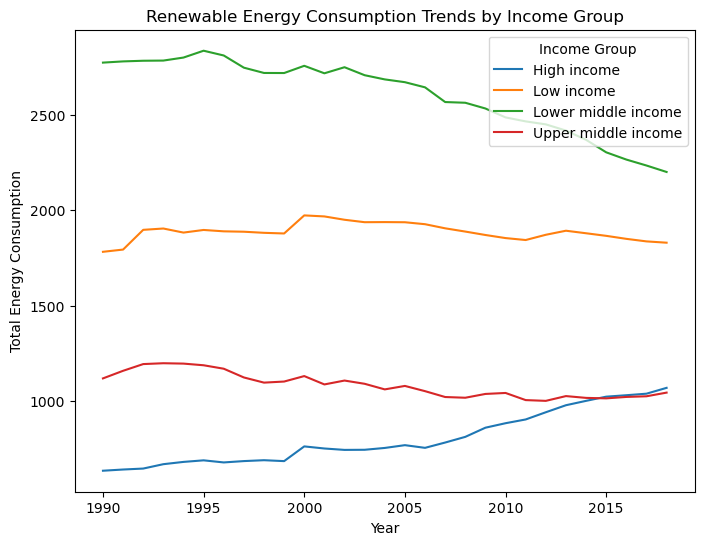

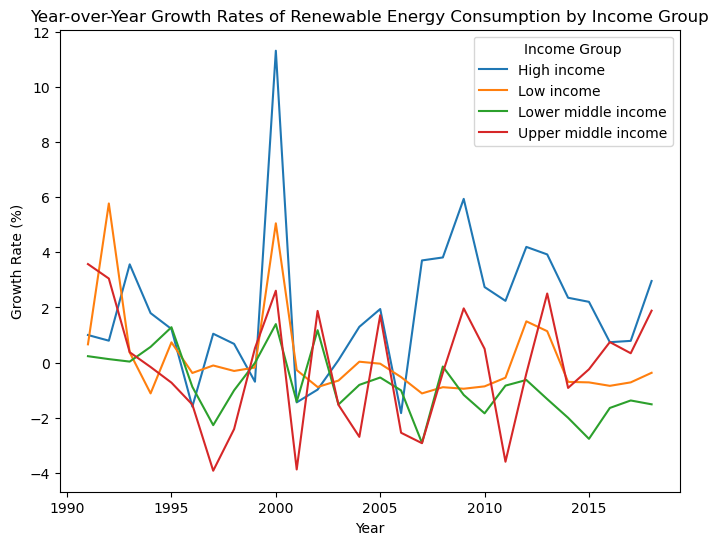

In [33]:
#Examine renewable energy consumption trends based on country income groups (e.g., low-income, middle-income, high-income)

# Extract the year from the 'Year' column for easier grouping
new_data['Year'] = new_data['Year'].dt.year

# Group by income group and year, then sum the energy consumption
income_group_data = new_data.groupby(['Income Group', 'Year'])['Energy Consump.'].sum().reset_index()

# Visualize the trends for each income group
plt.figure(figsize=(8,6))
sns.lineplot(data=income_group_data, x='Year', y='Energy Consump.', hue='Income Group')
plt.title('Renewable Energy Consumption Trends by Income Group')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend(title='Income Group') #to identify the lines
plt.show()

# Calculate year-over-year growth for each income group
income_group_data['Growth Rate (%)'] = income_group_data.groupby('Income Group')['Energy Consump.'].pct_change() * 100

# Visualize the growth rates for each income group
plt.figure(figsize=(8,6))
sns.lineplot(data=income_group_data, x='Year', y='Growth Rate (%)', hue='Income Group')
plt.title('Year-over-Year Growth Rates of Renewable Energy Consumption by Income Group')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Income Group')
plt.show()



Summary:
Overall Trends: The first plot shows how renewable energy consumption has evolved over the years for different income groups.

Growth Rates: The second plot shows the year-over-year growth rates in renewable energy consumption for each income group, highlighting periods of significant growth or decline.


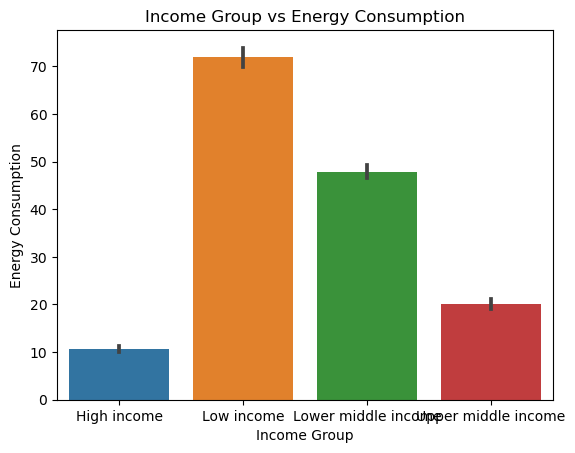

In [35]:
#visualize income group and energy consumption
sns.barplot( y='Energy Consump.',data=new_data,x='Income Group')
plt.title('Income Group vs Energy Consumption')
plt.xlabel('Income Group')
plt.ylabel('Energy Consumption')
plt.show()

          Income Group Energy Consump.                                        \
                                  mean         std          min          max   
0          High income      801.732390  138.384606   632.598577  1067.903604   
1           Low income     1887.095897   45.943892  1782.437172  1973.665603   
2  Lower middle income     2607.032872  193.759793  2201.732492  2838.597678   
3  Upper middle income     1082.328473   64.538646   999.552112  1197.183704   

  Growth Rate (%)                                 
             mean       std       min        max  
0        1.920138  2.651946 -1.836482  11.320984  
1        0.107262  1.641305 -1.122044   5.774569  
2       -0.818255  1.134551 -2.917469   1.394601  
3       -0.223793  2.169848 -3.929115   3.574184  


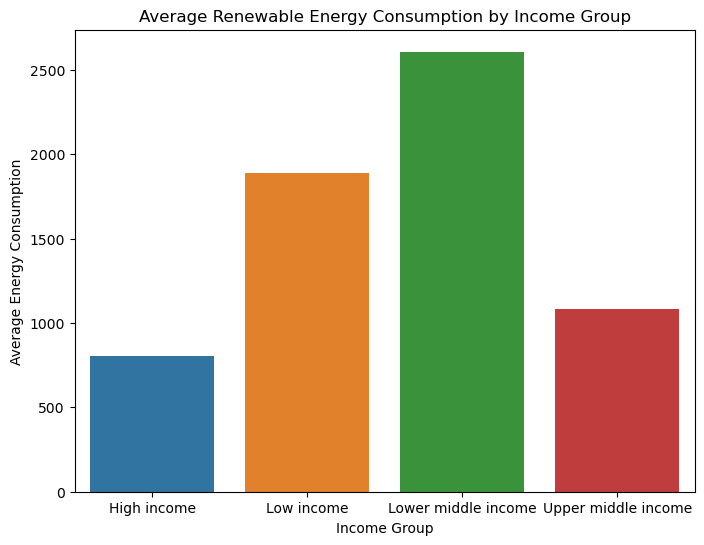

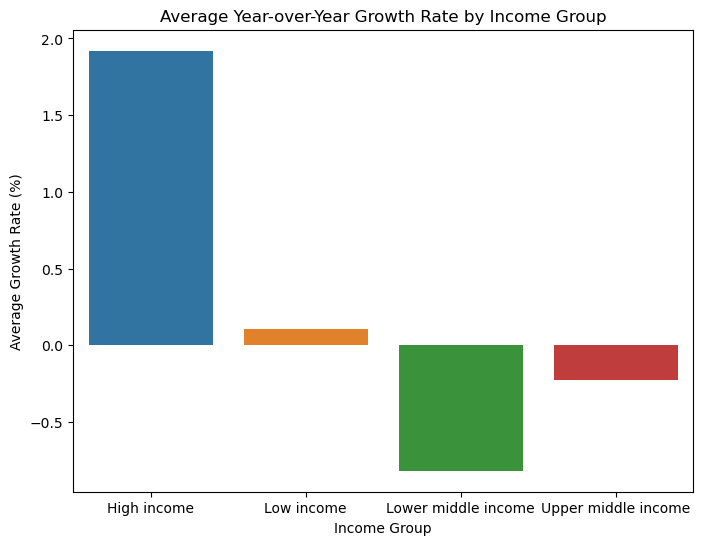

In [36]:
# Calculate summary statistics for each income group
summary_stats = income_group_data.groupby('Income Group').agg({
    'Energy Consump.': ['mean', 'std', 'min', 'max'],
    'Growth Rate (%)': ['mean', 'std', 'min', 'max']
}).reset_index()

# Display summary statistics
print(summary_stats)

# Visualize summary statistics for energy consumption
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Income Group', y=('Energy Consump.', 'mean'))
plt.title('Average Renewable Energy Consumption by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Energy Consumption')
plt.show()

# Visualize summary statistics for growth rates
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_stats, x='Income Group', y=('Growth Rate (%)', 'mean'))
plt.title('Average Year-over-Year Growth Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Growth Rate (%)')
plt.show()



Average Energy Consumption:

High-Income Countries: Have low average renewable energy consumption due to better resources and infrastructure.
Middle- and Low-Income Countries: Have higher average consumption levels


Growth Rates:

High-Income Countries:  show steady but moderate growth rates, indicating established renewable energy sectors.
Middle-Income Countries: Upper and middle income countries shows negative growth rate
Low-Income Countries: Steady growth rate

High income:

mean: The average energy consumption in high-income countries is approximately 801.73 units.
std: The standard deviation is 138.38 units, indicating some variability in energy consumption among high-income countries.
min: The lowest observed energy consumption in this group is 632.60 units.
max: The highest observed energy consumption in this group is 1067.90 units.
Low income:

mean: The average energy consumption in low-income countries is approximately 1887.10 units.
std: The standard deviation is 45.94 units, indicating relatively low variability in energy consumption among low-income countries.
min: The lowest observed energy consumption in this group is 1782.44 units.
max: The highest observed energy consumption in this group is 1973.67 units.
Lower middle income:

mean: The average energy consumption in lower-middle-income countries is approximately 2607.03 units.
std: The standard deviation is 193.76 units, indicating a higher variability in energy consumption among lower-middle-income countries compared to high and low-income groups.
min: The lowest observed energy consumption in this group is 2201.73 units.
max: The highest observed energy consumption in this group is 2838.60 units.
Upper middle income:

mean: The average energy consumption in upper-middle-income countries is approximately 1082.33 units.
std: The standard deviation is 64.54 units, indicating moderate variability in energy consumption among upper-middle-income countries.
min: The lowest observed energy consumption in this group is 999.55 units.
max: The highest observed energy consumption in this group is 1197.18 units.
Interpretation
High-income countries have relatively lower average energy consumption compared to the other income groups, but there is considerable variability within this group.
Low-income countries have higher average energy consumption with low variability, suggesting that energy consumption is fairly consistent across this group.
Lower middle income countries have the highest average energy consumption and the highest variability, indicating significant differences in energy consumption within this group.
Upper middle income countries have moderate average energy consumption with moderate variability, suggesting more uniform energy consumption compared to lower middle income countries but less so than high-income countries.

REGIONAL ANALYSIS

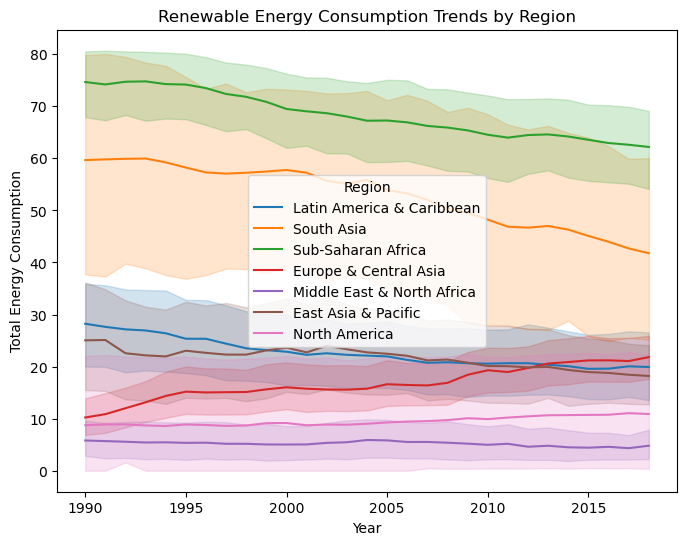

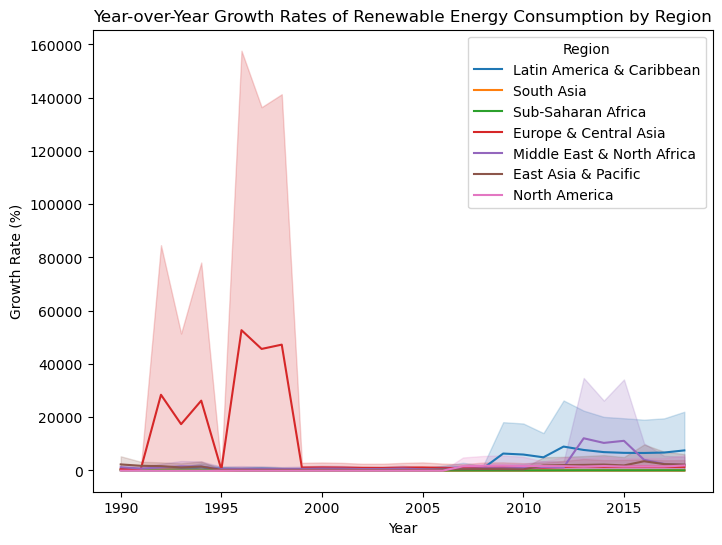

In [39]:
# Set the size of the plot
plt.figure(figsize=(8,6))

# Create a line plot for each region
sns.lineplot(data=new_data, x='Year', y='Energy Consump.', hue='Region')

# Add titles and labels
plt.title('Renewable Energy Consumption Trends by Region')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend(title='Region')
plt.show()

# Calculate year-over-year growth for each region
new_data['Growth Rate (%)'] = new_data.groupby('Region')['Energy Consump.'].pct_change() * 100
plt.figure(figsize=(8,6))

# Create a line plot for each region
sns.lineplot(data=new_data, x='Year', y='Growth Rate (%)', hue='Region')

# Add titles and labels
plt.title('Year-over-Year Growth Rates of Renewable Energy Consumption by Region')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Region')

# Display the plot
plt.show()



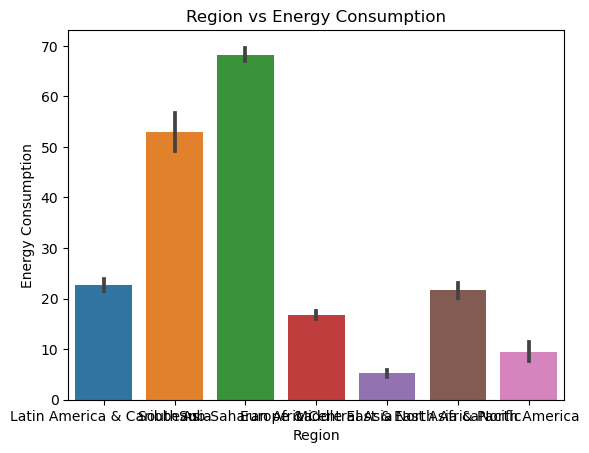

In [40]:
sns.barplot( y='Energy Consump.',data=new_data,x='Region')
plt.title('Region vs Energy Consumption')
plt.xlabel('Region')
plt.ylabel('Energy Consumption')
plt.show()

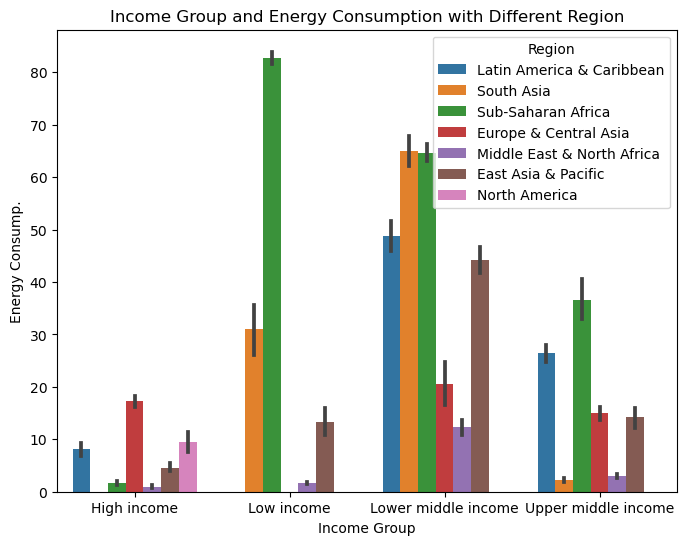

In [41]:
# Income group and energy consumption with diffrent reagion
plt.figure(figsize= (8,6))
sns.barplot(x='Income Group', y='Energy Consump.', hue='Region', data=new_data)
plt.title('Income Group and Energy Consumption with Different Region')
plt.xlabel('Income Group')
plt.ylabel('Energy Consump.')
plt.show()

MACHINE LEARNING

In [43]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Region'] = le.fit_transform(new_data['Region'])
new_data['Income Group'] = le.fit_transform(new_data['Income Group'])
new_data['Indicator Name'] = le.fit_transform(new_data['Indicator Name'])
new_data['Country Name'] = le.fit_transform(new_data['Country Name'])
new_data['Indicator Code'] = le.fit_transform(new_data['Indicator Code'])


In [44]:
new_data.drop(['Growth Rate (%)'],axis=1,inplace=True)

                 Energy Consump.    Region  Income Group
Energy Consump.         1.000000  0.598877      0.168028
Region                  0.598877  1.000000      0.106657
Income Group            0.168028  0.106657      1.000000


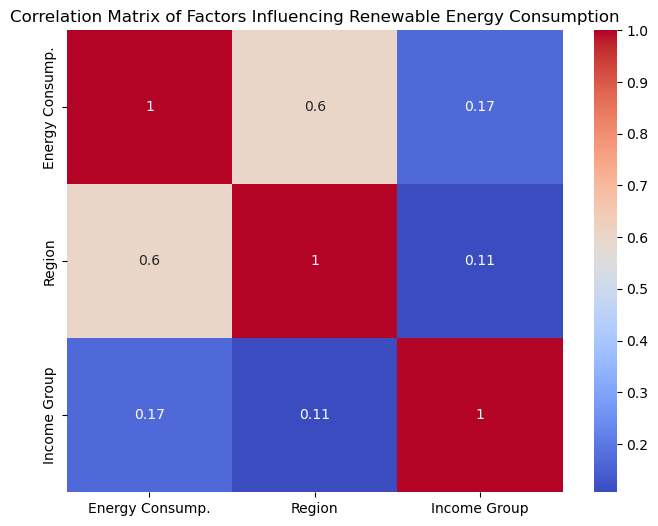

In [45]:
# Select relevant columns for correlation analysis
correlation_data = new_data[['Energy Consump.', 'Region', 'Income Group']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

# Create a heatmap of the correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Factors Influencing Renewable Energy Consumption')
plt.show()


LINEAR REGRESSION

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [48]:
#feature enegineering
x=new_data.drop(['Energy Consump.'],axis=1)
y=new_data['Energy Consump.']

In [49]:

#split the dataset into training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.2,random_state=42)

#create a varaible name for your model
model = LinearRegression()

#train the model on the data
model.fit(x_train,y_train)

#make the predictations
y_pred =model.predict(x_test)

#calculate the accuracy
r2 =r2_score(y_test,y_pred)
print(f"Accuracy,{r2}")

Accuracy,0.3908013088930776


The accuracy is very low  at 39.08% and the model will not perform well

**RANDOM FOREST**

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.619261721827996
R-squared: 0.9961089732582502


Mean Squared Error (MSE): 3.619261721827996

This is an exceptionally low MSE, indicating that the model's predictions are extremely close to the actual values.
R-squared: 0.9961089732582502

An R-squared value this close to 1 is extraordinary. It signifies that the model explains almost 99.61% of the variability in the dependent variable.

GRADIANT BOOSSTING MODEL


Gradient boosting regressor builds an ensemble of decision trees sequentially, where each tree tries to correct the errors of the previous one.

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 125.10316472608
R-squared: 0.8655030233124855


The lower MSE of 125.103 indicates better prediction accuracy, and the higher R-squared 86.55% shows that the model explains a larger portion of the data's variation.

Support Vector Regression (SVR)


Support vector regression uses the principles of support vector machines for regression tasks.




In [58]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = SVR(kernel='linear', C=100, epsilon=0.1)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 577.2459447169076
R-squared: 0.3794095094273249


MSE of 577.25 is quite far from the actual values and even the R2 is way below at only 37.95%

KNN -MODEL

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 186.52585870290338
R-squared: 0.7994681899173959


The  model is a decent fit for the data (R-squared = 0.7995).

However, the model's predictions are still quite far off from the actual values on average (MSE = 186.526).